# Udemy Course
## From 0 to 1: Machine Learning, NLP & Python-Cut to the

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import nltk
# To start, we need some text to play with. NLTK has many corpora and resources for you to explore natural language. 
# A one-off run of nltk.download() will get you all the resources in one go. Once you've done that you should have 
# a repository of interesting texts including stuff like Moby Dick and an Inaugural Address Corpus
# nltk.download()
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
# These texts have now been loaded and you can refer to them by their names. These are objects of type 'Text' and they have a
# bunch of cool methods to explore the text 

# concordance will print all the occurrences of a word along with some context. Let's explore two texts - Moby Dick and 
# Sense and Sensibility. As expected, word usage and language in both these books are pretty different :) 

text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [4]:
text2.concordance("monstrous")

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


## Examples from the nltk book - www.nltk.org

In [5]:
# As you can see, Melville uses the word 'monstrous' in a different connotation than Austen. He uses it to indicate
# size and things that are terrifying, Austen uses it in a positive connotation
# Let's see what other words appear in the same context as monstrous
text2.similar("monstrous")

very exceedingly so heartily a great good amazingly as sweet
remarkably extremely vast


In [6]:
# Clearly Austen uses "monstrous" to represent positive emotions and to amplify those emotions. She seems to use it 
# interchangeably with "very"  
text2.common_contexts(["monstrous","very"])

a_pretty is_pretty a_lucky am_glad be_glad


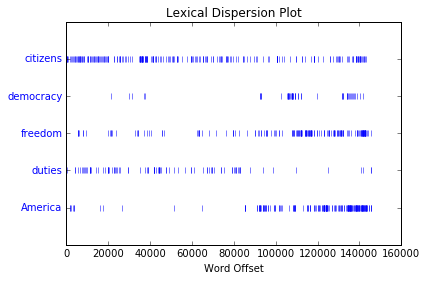

In [7]:
# These are fun ways to explore the usage of natural language in different contexts or situations. Let's see how the 
# usage of certain words by Presidents has changed over the years. 
# (Do install matplotlib before you run the below line of code)
text4.dispersion_plot(["citizens","democracy","freedom","duties","America"])

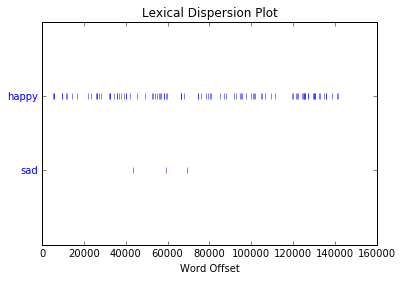

In [8]:
# Let's see what kind of emotions are expressed in Jane Austen's works vs Herman Melville's
text2.dispersion_plot(["happy","sad"])

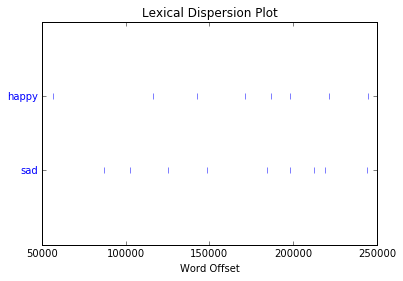

In [9]:
text1.dispersion_plot(["happy","sad"])

In [10]:
# Now let's get to some serious stuff. Often you want to extract features from 
# a text - these are attributes that will represent the text - words or sentences 
# How do we split a piece of text into constituent sentences/words? (these are called tokens)
from nltk.tokenize import word_tokenize, sent_tokenize
text="Mary had a little lamb. Her fleece was white as snow"
sents=sent_tokenize(text)
print(sents)

['Mary had a little lamb.', 'Her fleece was white as snow']


In [11]:
words=[word_tokenize(sent) for sent in sents]
print(words)

[['Mary', 'had', 'a', 'little', 'lamb', '.'], ['Her', 'fleece', 'was', 'white', 'as', 'snow']]


In [12]:
# Let's filter out stopwords (words that are very common like 'was', 'a', 'as etc)
from nltk.corpus import stopwords 
from string import punctuation
customStopWords=set(stopwords.words('english')+list(punctuation))
#Notice how we made the stopwords a set

wordsWOStopwords=[word for word in word_tokenize(text) if word not in customStopWords]
print(wordsWOStopwords)

['Mary', 'little', 'lamb', 'Her', 'fleece', 'white', 'snow']


In [13]:
text2="Mary closed on closing night when she was in the mood to close."
# 'close' appears in different morphological forms here, stemming will reduce all forms of the word 'close' to its root
# NLTK has multiple stemmers based on different rules/algorithms. Stemming is also known as lemmatization. 
from nltk.stem.lancaster import LancasterStemmer
st=LancasterStemmer()
stemmedWords=[st.stem(word) for word in word_tokenize(text2)]
print(stemmedWords)

['mary', 'clos', 'on', 'clos', 'night', 'when', 'she', 'was', 'in', 'the', 'mood', 'to', 'clos', '.']


In [14]:
# NLTK has functionality to automatically tag words as nouns, verbs, conjunctions etc
nltk.pos_tag(word_tokenize(text2))

[('Mary', 'NNP'),
 ('closed', 'VBD'),
 ('on', 'IN'),
 ('closing', 'NN'),
 ('night', 'NN'),
 ('when', 'WRB'),
 ('she', 'PRP'),
 ('was', 'VBD'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mood', 'NN'),
 ('to', 'TO'),
 ('close', 'VB'),
 ('.', '.')]

### 講座 31 Python Drill : Autosummarize News Articles 

In [1]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from string import punctuation
from heapq import nlargest

# punctuation 標點

In [2]:
#  sent_tokenize: given a group of text, tokenize (split) it into sentences
#  word_tokenize: given a group of text, tokenize (split) it into words

class FrequencySummarizer:
    # indentation changes - we are now inside the class definition
    def __init__(self, min_cut=0.1, max_cut=0.9):
        # The constructor named __init__
        # THis function will be called each time an object of this class is 
        # instantiated
        # btw, note how the special keyword 'self' is passed in as the first
        # argument to each method (member function).
        self._min_cut = min_cut
        self._max_cut = max_cut 
        # Words that have a frequency term lower than min_cut 
        # or higer than max_cut will be ignored.
        self._stopwords = set(stopwords.words('english') + list(punctuation))
        # Punctuation symbols and stopwords (common words like 'an','the' etc) are ignored
        #
        # Here self._min_cut, self._max_cut and self._stopwords are all member variables
        # i.e. each object (instance) of this class will have an independent version of these
        # variables. 
        # Note how this function is used to set up the member variables to their appropriate values
    # indentation changes - we are out of the constructor (member function, but we are still inside)
    # the class.
    # One important note: if you are used to programming in Java or C#: if you define a variable here
    # i.e. outside a member function but inside the class - it becomes a STATIC member variable
    # THis is an important difference from Java, C# (where all member variables would be defined here)
    # and is a common gotcha to be avoided.

    def _compute_frequencies(self, word_sent):
        # next method (member function) which takes in self (the special keyword for this same object)
        # as well as a list of sentences, and outputs a dictionary, where the keys are words, and
        # values are the frequencies of those words in the set of sentences
        freq = defaultdict(int)
        # defaultdict, which we referred to above - is a class that inherits from dictionary,
        # with one difference: Usually, a Python dictionary throws a KeyError if you try 
        # to get an item with a key that is not currently in the dictionary. 
        # The defaultdict in contrast will simply create any items that you try to access 
        # (provided of course they do not exist yet). THe 'int' passed in as argument tells
        # the defaultdict object to create a default value of 0
        for s in word_sent:
        # indentation changes - we are inside the for loop, for each sentence
          for word in s:
            # indentation changes again - this is an inner for loop, once per each word_sent
            # in that sentence
            if word not in self._stopwords:
                # if the word is in the member variable (dictionary) self._stopwords, then ignore it,
                # else increment the frequency. Had the dictionary freq been a regular dictionary (not a 
                # defaultdict, we would have had to first check whether this word is in the dict
                freq[word] += 1
        # Done with the frequency calculation - now go through our frequency list and do 2 things
        #   normalize the frequencies by dividing each by the highest frequency (this allows us to 
        #            always have frequencies between 0 and 1, which makes comparing them easy
        #   filter out frequencies that are too high or too low. A trick that yields better results.
        m = float(max(freq.values()))
        # get the highest frequency of any word in the list of words
        for w in freq.keys():
            # indentation changes - we are inside the for loop
            freq[w] = freq[w]/m
            # divide each frequency by that max value, so it is now between 0 and 1
            if freq[w] >= self._max_cut or freq[w] <= self._min_cut:
                # indentation changes - we are inside the if statement - if we are here the word is either
                # really common or really uncommon. In either case - delete it from our dictionary
                del freq[w]
                # remember that del can be used to remove a key-value pair from the dictionary
        return freq
        # return the frequency list

    def summarize(self, text, n):
        # next method (member function) which takes in self (the special keyword for this same object)
        # as well as the raw text, and the number of sentences we wish the summary to contain. Return the 
        # summary
        sents = sent_tokenize(text)
        # split the text into sentences
        assert n <= len(sents)
        # assert is a way of making sure a condition holds true, else an exception is thrown. Used to do 
        # sanity checks like making sure the summary is shorter than the original article.
        word_sent = [word_tokenize(s.lower()) for s in sents]
        # This 1 sentence does a lot: it converts each sentence to lower-case, then 
        # splits each sentence into words, then takes all of those lists (1 per sentence)
        # and mushes them into 1 big list
        self._freq = self._compute_frequencies(word_sent)
        # make a call to the method (member function) _compute_frequencies, and places that in
        # the member variable _freq. 
        ranking = defaultdict(int)
        # create an empty dictionary (of the superior defaultdict variety) to hold the rankings of the 
            # sentences. 
        for i,sent in enumerate(word_sent):
            # Indentation changes - we are inside the for loop. Oh! and this is a different type of for loop
            # A new built-in function, enumerate(), will make certain loops a bit clearer. enumerate(sequence), 
            # will return (0, thing[0]), (1, thing[1]), (2, thing[2]), and so forth.
            # A common idiom to change every element of a list looks like this:
            #  for i in range(len(L)):
            #    item = L[i]
            #    ... compute some result based on item ...
            #    L[i] = result
            # This can be rewritten using enumerate() as:
            # for i, item in enumerate(L):
            #    ... compute some result based on item ...
            #    L[i] = result
            for w in sent:
                # for each word in this sentence
                if w in self._freq:
                    # if this is not a stopword (common word), add the frequency of that word 
                    # to the weightage assigned to that sentence 
                    ranking[i] += self._freq[w]
        # OK - we are outside the for loop and now have rankings for all the sentences
        sents_idx = nlargest(n, ranking, key=ranking.get)
        # we want to return the first n sentences with highest ranking, use the nlargest function to do so
        # this function needs to know how to get the list of values to rank, so give it a function - simply the 
        # get method of the dictionary
        return [sents[j] for j in sents_idx]
       # return a list with these values in a list
# Indentation changes - we are done with our FrequencySummarizer class!

In [3]:
import urllib2
from bs4 import BeautifulSoup

In [5]:
def get_only_text_washington_post_url(url):
    # This function takes in a URL as an argument, and returns only the text of the article in that URL. 
    page = urllib2.urlopen(url).read().decode('utf8')
    # download the URL
    soup = BeautifulSoup(page)
    # initialise a BeautifulSoup object with the text of that URL
    text = ' '.join(map(lambda p: p.text, soup.find_all('article')))
    # use this code to get everything in that text that lies between a pair of 
    # <article> and </article> tags. We do this because we know that the URLs we are currently
    # interested in - those from the WashingtonPost have this nice property

    # OK - we got everything between the <article> and </article> tags, but that everything
    # includes a bunch of other stuff we don't want
    # Now - repeat, but this time we will only take what lies between <p> and </p> tags
    # these are HTML tags for "paragraph" i.e. this should give us the actual text of the article
    soup2 = BeautifulSoup(text, "lxml")
    if soup2.find_all('p')!=[]:
        text = ' '.join(map(lambda p: p.text, soup2.find_all('p')))
    # use this code to get everything in that text that lies between a pair of 
    # <p> and </p> tags. We do this because we know that the URLs we are currently
    # interested in - those from the WashingtonPost have this nice property
    return soup.title.text, text
# Return a pair of values (article title, article body)
# Btw note that BeautifulSoup return the title without our doing anything special - 
# this is why BeautifulSoup works so much better than say regular expressions at parsing HTML


#####################################################################################
# OK! Now lets give this code a spin
#####################################################################################
someUrl = "https://www.washingtonpost.com/news/the-switch/wp/2015/08/06/why-kids-are-meeting-more-strangers-online-than-ever-before/"
# the article we would like to summarize
textOfUrl = get_only_text_washington_post_url(someUrl)
# get the title and text
fs = FrequencySummarizer()
# instantiate our FrequencySummarizer class and get an object of this class
summary = fs.summarize(textOfUrl[1], 3)
# get a summary of this article that is 3 sentences long

In [11]:
summary

[u'"The digital world has taken its place alongside school and friends\' houses and extracurriculars as a place where teens go to make and strengthen friendships," said Amanda Lenhart, author of the report "Teens, Technology & Friendships" and an associate\xa0director of research at Pew.',
 u'"Young people are very aware that people have highly curated images and that text fights can quickly go out of control and they are trying to sort it all out," said Rosalind Wiseman, author of "Queen Bees and Wannabes" and speaker on youth issues.',
 u"Nearly half of those surveyed say they've at least occasionally seen posts about events that they were invited to; and\xa085 percent said they think social media users present a carefully crafted image of themselves online that may not be authentic."]

In [8]:
# URL 可直接去www.washingtonpost.com 找一篇新的文章
someUrl = "https://www.washingtonpost.com/politics/blues-brothers-don-jr-and-eric-trump-gamble-on-mississippi-tourism/2017/10/22/e906c8f0-aacc-11e7-b3aa-c0e2e1d41e38_story.html?hpid=hp_hp-top-table-main_no-name%3Ahomepage%2Fstory&utm_term=.d49369529ad7"
textOfUrl = get_only_text_washington_post_url(someUrl)

In [9]:
textOfUrl

# \u2019 : ' , \u2014: — , \u201c: " , \u201d: "

(u'Blues brothers Don Jr. and Eric Trump gamble on Mississippi tourism - The Washington Post',
 u'CLEVELAND, MISS. \u2014 Jake Brown crooned the Mississippi blues to a nearly all-black audience on the outskirts of town, his guitar filling the darkened club with pangs of heartbreak and regret.   Between numbers, the local singer paused and in a gravelly drawl, beseeched the crowd to be thankful. For God. For the Mississippi blues. And for Donald Trump\u2019s hotel, being built on the other side of Cleveland. \u201cHave you all been out west of Cleveland?\u201d he queried his audience. \u201cTo those that don\u2019t know, get ready. Get ready, \u2019cause the blues is on the way.\u201d President Trump\u2019s hotel company, the New York-based managers of luxury properties and golf courses around the globe, seems an unlikely presence in this struggling stretch of the Delta, where new businesses are hard to recruit and black residents are eight times more likely than whites to face unemploy

In [2]:
n = 42
s = 'dddddd'
'{}-{}'.format(n, s)

'42-dddddd'

In [4]:
from string import punctuation
list(punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']